In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.describe()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               20 non-null     int64  
 1   Glucose                   20 non-null     int64  
 2   BloodPressure             20 non-null     int64  
 3   SkinThickness             20 non-null     int64  
 4   Insulin                   20 non-null     int64  
 5   BMI                       20 non-null     float64
 6   DiabetesPedigreeFunction  20 non-null     float64
 7   Age                       20 non-null     int64  
 8   Outcome                   20 non-null     int64  
dtypes: float64(2), int64(7)
memory usage: 1.5 KB


Visualize relationships & correlations

In [7]:
plt.figure(figsize = (10,8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

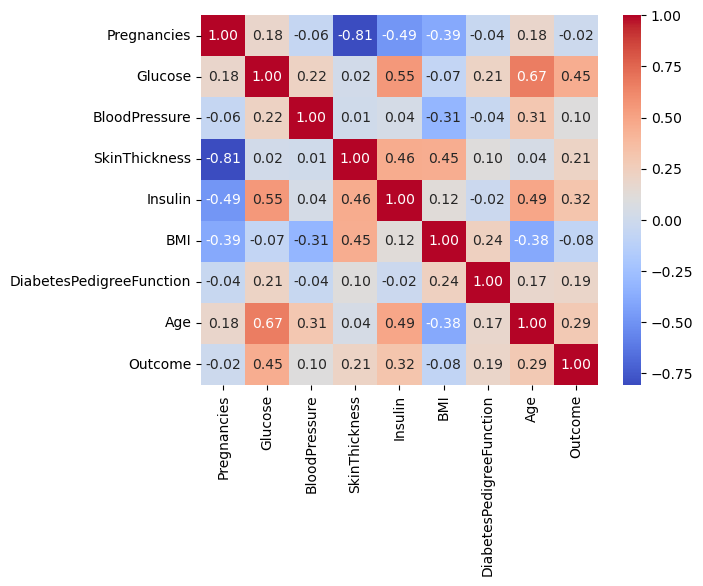

In [13]:
sns.heatmap(df.corr(), annot = True, fmt = ".2f", cmap = 'coolwarm')
plt.show()

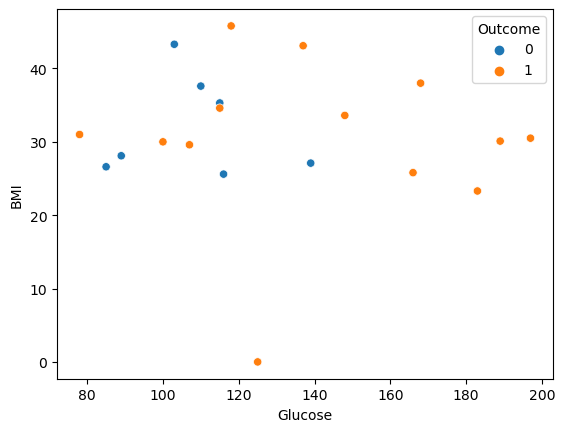

In [10]:
sns.scatterplot(x = 'Glucose', y = 'BMI', hue = 'Outcome', data = df);
plt.show()

Handle obvious invalid zeros

In [14]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [16]:
col_missing_zero = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
df[col_missing_zero] = df[col_missing_zero].replace(0,np.nan)

In [17]:
df[col_missing_zero].isnull().sum()

Glucose           0
BloodPressure     2
SkinThickness     9
Insulin          11
BMI               1
dtype: int64

In [21]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
df[col_missing_zero] = imputer.fit_transform(df[col_missing_zero])

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [23]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
x = df.drop('Outcome', axis = 1)
y = df['Outcome']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42, stratify=y)

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(16, 8) (4, 8) (16,) (4,)


In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [29]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(x_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [31]:
y_pred = model.predict(x_test)
y_proba = model.predict_proba(x_test)[:,1]

Accuracy: 0.75
Precision: 0.75
Recall: 1.0
F1: 0.8571428571428571

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.75      1.00      0.86         3

    accuracy                           0.75         4
   macro avg       0.38      0.50      0.43         4
weighted avg       0.56      0.75      0.64         4



C:\Users\chera\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chera\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chera\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


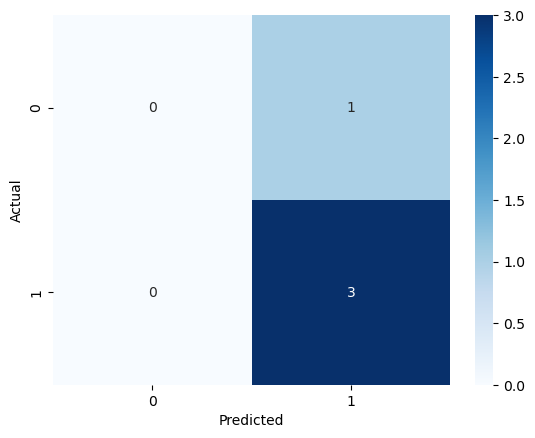

ROC AUC: 0.0


In [33]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.show()

print("ROC AUC:", roc_auc_score(y_test, y_proba))